In [1]:
import pandas as pd
import numpy as np
import ast

# 1# Data Insight

<p style="text-align: justify;"> In this part, we will display all the 5 different data bases at disposal. Some features will also be simplified into more efficient structures. Eventually, all the data will be merged into one coherent non-repetitive dataframe. </p>

In [2]:
DATA_PATHWAY = './data/'

## 1.1# Data Import

In [3]:
plot_summaries = pd.read_csv(DATA_PATHWAY + 'plot_summaries.txt', sep='\t', header=None, names=['movie_id', 'plot_summary'])
plot_summaries.head(10)

,movie_id,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
5,5272176,The president is on his way to give a speech. ...
6,1952976,"{{plot}} The film opens in 1974, as a young gi..."
7,24225279,"The story begins with Hannah, a young Jewish t..."
8,2462689,Infuriated at being told to write one final co...
9,20532852,A line of people drool at the window of the s...


In [4]:
name_clusters = pd.read_csv(DATA_PATHWAY + 'name.clusters.txt', sep='\t', header=None, names=['char_name', 'freebase_char_actor_map_id'])
name_clusters.head(10)

,char_name,freebase_char_actor_map_id
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn
5,Josh Framm,/m/0jt3p3
6,Josh Framm,/m/0jt3t3
7,Caspian X,/m/0646flc
8,Caspian X,/m/02vd12n
9,Apostle Peter,/m/02vd6_v


In [5]:
tvtropes_clusters = pd.read_csv(DATA_PATHWAY + 'tvtropes.clusters.txt', sep='\t', header=None, names=['char_trope', 'attr'])
tvtropes_clusters.head(10)

,char_trope,attr
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
5,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
6,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
7,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
8,adventurer_archaeologist,"{""char"": ""Evelyn Carnahan-O'Connell"", ""movie"":..."
9,arrogant_kungfu_guy,"{""char"": ""Han"", ""movie"": ""Enter the Dragon"", ""..."


In [6]:
char_meta_columns = ['movie_id',
                     'freebase_movie_id',
                     'release_date',
                     'char_name',
                     'actor_birth_date',
                     'actor_gender',
                     'actor_height', 
                     'freebase_actor_ethnicity',
                     'actor_name',
                     'actor_age_at_movie_release',
                     'freebase_char_actor_map_id',
                     'freebase_char_id',
                     'freebase_actor_id']

char_metadata = pd.read_csv(DATA_PATHWAY + 'character.metadata.tsv', sep='\t', header=None, names=char_meta_columns)
char_metadata.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [7]:
movie_meta_columns = ['movie_id',
                    'freebase_movie_id',
                    'movie_name',
                    'release_date',
                    'box_office_revenue',
                    'runtime',
                    'languages',
                    'countries',
                    'genres']

movie_metadata = pd.read_csv(DATA_PATHWAY + 'movie.metadata.tsv', sep='\t', header=None, names=movie_meta_columns)
movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


## 1.2# Features Simplification

<p style="text-align: justify;"> In this subpart, we will decompose complex features and repetitive informations into simpler additional features for computational efficiency.  </p>

### 1.2.1# Tvtropes_clusters

In [8]:
# Conversion of the dict feature into several columns
clust = tvtropes_clusters.attr.apply(lambda x: pd.Series(ast.literal_eval(x)))
tvtropes_clusters = pd.concat([tvtropes_clusters, clust], axis=1).drop('attr', axis = 1)

# Renaming of the columns
tvtropes_columns = ['char_trope', 
                    'char_name', 
                    'movie_name', 
                    'freebase_char_actor_map_id', 
                    'actor_name']

tvtropes_clusters.columns = tvtropes_columns
tvtropes_clusters.head(5)

,char_trope,char_name,movie_name,freebase_char_actor_map_id,actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [9]:
# Identification of several tropes for one given role
tvtropes_clusters['names'] = tvtropes_clusters.char_name + tvtropes_clusters.movie_name + tvtropes_clusters.actor_name
tvtropes_clusters['names'].is_unique

False

In [10]:
# Extent the non-uniques indexed rows into several columns named like 'char_trope_2'
nb_tropes = tvtropes_clusters.groupby(['names']).cumcount()
m = nb_tropes.astype(bool) * ('_'+(nb_tropes+1).astype(str))
tvtropes_clusters = tvtropes_clusters.set_index(['names', m]).unstack().sort_index(level=1, axis=1).reset_index()
tvtropes_clusters.columns = tvtropes_clusters.columns.map(lambda x: f'{x[0]}{x[1]}')

tvtropes_clusters.head(5)

,names,actor_name,char_name,char_trope,freebase_char_actor_map_id,movie_name,actor_name_2,char_name_2,char_trope_2,freebase_char_actor_map_id_2,...,actor_name_4,char_name_4,char_trope_4,freebase_char_actor_map_id_4,movie_name_4,actor_name_5,char_name_5,char_trope_5,freebase_char_actor_map_id_5,movie_name_5
0,Aaron HallamThe HuntedBenicio del Toro,Benicio del Toro,Aaron Hallam,pupil_turned_to_evil,/m/03ls4jv,The Hunted,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abel TurnerLakeview TerraceSamuel L. Jackson,Samuel L. Jackson,Abel Turner,dirty_cop,/m/02tb650,Lakeview Terrace,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AbuThe Thief of BagdadSabu Dastagir,Sabu Dastagir,Abu,loveable_rogue,/m/0k6nkk,The Thief of Bagdad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AchillesTroyBrad Pitt,Brad Pitt,Achilles,byronic_hero,/m/0k7ckp,Troy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AgathaMinority ReportSamantha Morton,Samantha Morton,Agatha,junkie_prophet,/m/0k0pgt,Minority Report,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Keep only relevant repetitive columns i.e. char_trope features
char_tropes = [feature for feature in tvtropes_clusters if feature.startswith('char_trope')]
tvtropes_clusters = tvtropes_clusters[['movie_name', 'char_name', 'actor_name', 'freebase_char_actor_map_id'] + char_tropes]

tvtropes_clusters.rename(columns = {'char_trope':'char_trope_1'}, inplace = True)
tvtropes_clusters.head(5)

,movie_name,char_name,actor_name,freebase_char_actor_map_id,char_trope_1,char_trope_2,char_trope_3,char_trope_4,char_trope_5
0,The Hunted,Aaron Hallam,Benicio del Toro,/m/03ls4jv,pupil_turned_to_evil,NaN,NaN,NaN,NaN
1,Lakeview Terrace,Abel Turner,Samuel L. Jackson,/m/02tb650,dirty_cop,NaN,NaN,NaN,NaN
2,The Thief of Bagdad,Abu,Sabu Dastagir,/m/0k6nkk,loveable_rogue,NaN,NaN,NaN,NaN
3,Troy,Achilles,Brad Pitt,/m/0k7ckp,byronic_hero,NaN,NaN,NaN,NaN
4,Minority Report,Agatha,Samantha Morton,/m/0k0pgt,junkie_prophet,NaN,NaN,NaN,NaN


### 1.2.2# Movie_metadata

In [12]:
# Erase the useless caracters of dict features and convert into lists
def extract_values(s):
    s = s.split(',')
    for i in range(len(s)):
        s[i] = s[i][s[i].find('": "')+len('": "'):]
        s[i] = s[i][:s[i].find('"')]
    s.sort()
    return list(','.join(s).split(","))

# Simplify the displaying of languages, countries and genres
movie_metadata.languages = movie_metadata.languages.apply(extract_values)
movie_metadata.countries = movie_metadata.countries.apply(extract_values)
movie_metadata.genres = movie_metadata.genres.apply(extract_values)

movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Action, Adventure, Horror, Science Fiction, S..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Biographical film, Crime Drama, Drama, Mystery]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Erotic thriller, Psychological thriller, Thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [13]:
# Transform a feature of lists into several features
def extent_list_feature(df, f_name):
    
    # Generate the names of the new extented columns like 'f_name_1' 
    column_names = []
    for i in range(1, df[f_name].str.len().max()+1):
        column_names = np.append(column_names, f_name + '_' + str(i))
        
    # Extent the list column into several columns
    extended_columns = pd.DataFrame(df[f_name].to_list(), columns=column_names)
    
    # Add the new extended columns to the initial dataframe
    df = pd.concat([df, extended_columns], axis=1).drop(f_name, axis = 1)
        
    return df

movie_metadata = extent_list_feature(movie_metadata, 'languages')
movie_metadata = extent_list_feature(movie_metadata, 'countries')
movie_metadata = extent_list_feature(movie_metadata, 'genres')

movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages_1,languages_2,languages_3,languages_4,...,genres_8,genres_9,genres_10,genres_11,genres_12,genres_13,genres_14,genres_15,genres_16,genres_17
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## 1.3# Data Merging ##

### 1.3.1# Data relative to the movies only

In [14]:
# We prevent plot summaries without any other metadata
movie_data = movie_metadata.merge(plot_summaries, how='left')
movie_data.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages_1,languages_2,languages_3,languages_4,...,genres_9,genres_10,genres_11,genres_12,genres_13,genres_14,genres_15,genres_16,genres_17,plot_summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,"Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,None,None,None,...,None,None,None,None,None,None,None,None,None,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,None,None,None,...,None,None,None,None,None,None,None,None,None,"Eva, an upper class housewife, becomes frustra..."


### 1.3.2# Data relative to the characters

In [15]:
def merge_uncomplete_features(main_df, df, merging_feature, how_='left'):
    """ Enrich the NaN values of main_df features, if possible, by merging with df.
    
    Args:
        main_df (pd.DataFrame): dataframe whose NaN values will be replaced if possible on some common features
        df (pd.DataFrame): dataframe that complete NaN values of main_df
        merging_feature (pd.Series): common feature between main_df and df that will permit the merge between the two
        how_  (str): how argument of the merge
        
    Return:
        df_merge (pd.DataFrame): updated version of main_df
    """
    
    # Merge on the merging feature + extent common features in 2 columns such as 'movie_name' and 'movie_name_copy'
    df_merge = pd.merge(main_df, df.set_index(merging_feature), how=how_, right_index=True, left_on=merging_feature, suffixes=['', '_copy'])
    
    # Common features between main_df and df
    common_features = np.array(main_df.columns.intersection(df.set_index(merging_feature).columns))
    
    # Invert the Nan value of the initial main_df feature with its version in df, then drop the copied feature
    for ind, feature in enumerate(common_features):
        df_merge.loc[df_merge[feature].isnull(), [feature, feature + '_copy']] = df_merge.loc[df_merge[feature].isnull(), [feature + '_copy', feature]].values
        df_merge = df_merge.drop(feature + '_copy', axis=1)
    
    return df_merge

In [16]:
# Enrich the NaN values within the char_name feature of char_metadata with names_clusters if possible. 
char_data = merge_uncomplete_features(char_metadata, name_clusters, 'freebase_char_actor_map_id')
char_data = char_data[~char_data.index.duplicated()]
char_data.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [17]:
# Enrich the NaN values within numerous features of char_metadata with tvtropes_clusters if possible + add char_tropes features
char_data = merge_uncomplete_features(char_data, tvtropes_clusters, 'freebase_char_actor_map_id')
char_data.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id,movie_name,char_trope_1,char_trope_2,char_trope_3,char_trope_4,char_trope_5
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN,NaN,NaN,NaN,NaN,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN,NaN,NaN,NaN,NaN,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,NaN,NaN,NaN,NaN,NaN,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN,NaN,NaN,NaN,NaN,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3.3# Overall Merge

In [18]:
big_data = merge_uncomplete_features(movie_data, char_data, 'freebase_movie_id', 'outer')
big_data = big_data.drop([feature for feature in big_data if feature.startswith('freebase')], axis=1)

big_data.head(5)

,movie_id,movie_name,release_date,box_office_revenue,runtime,languages_1,languages_2,languages_3,languages_4,languages_5,...,actor_birth_date,actor_gender,actor_height,actor_name,actor_age_at_movie_release,char_trope_1,char_trope_2,char_trope_3,char_trope_4,char_trope_5
0,975900.0,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,None,...,1958-08-26,F,1.620,Wanda De Jesus,42.0,NaN,NaN,NaN,NaN,NaN
0,975900.0,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,None,...,1974-08-15,F,1.780,Natasha Henstridge,27.0,NaN,NaN,NaN,NaN,NaN
0,975900.0,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,None,...,1969-06-15,M,1.727,Ice Cube,32.0,NaN,NaN,NaN,NaN,NaN
0,975900.0,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,None,...,1967-09-12,M,1.750,Jason Statham,33.0,NaN,NaN,NaN,NaN,NaN
0,975900.0,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,None,...,1977-09-25,F,1.650,Clea DuVall,23.0,NaN,NaN,NaN,NaN,NaN


In [19]:
# Erase cryptic freebase ID
big_data.columns

Index(['movie_id', 'movie_name', 'release_date', 'box_office_revenue',
       'runtime', 'languages_1', 'languages_2', 'languages_3', 'languages_4',
       'languages_5', 'languages_6', 'languages_7', 'languages_8',
       'languages_9', 'languages_10', 'languages_11', 'languages_12',
       'languages_13', 'languages_14', 'languages_15', 'countries_1',
       'countries_2', 'countries_3', 'countries_4', 'countries_5',
       'countries_6', 'countries_7', 'countries_8', 'countries_9',
       'countries_10', 'countries_11', 'countries_12', 'countries_13',
       'countries_14', 'genres_1', 'genres_2', 'genres_3', 'genres_4',
       'genres_5', 'genres_6', 'genres_7', 'genres_8', 'genres_9', 'genres_10',
       'genres_11', 'genres_12', 'genres_13', 'genres_14', 'genres_15',
       'genres_16', 'genres_17', 'plot_summary', 'char_name',
       'actor_birth_date', 'actor_gender', 'actor_height', 'actor_name',
       'actor_age_at_movie_release', 'char_trope_1', 'char_trope_2',
       'char

In [20]:
# get positive-negative wordlists
import requests

url_positive = "https://ptrckprry.com/course/ssd/data/positive-words.txt"
rsp = requests.get(url_positive)
lines = rsp.text.strip("\n").split("\n")
positive = lines[lines.index('a+'):]

url_negative = "https://ptrckprry.com/course/ssd/data/negative-words.txt"
rsp = requests.get(url_negative)
lines = rsp.text.strip("\n").split("\n")
negative = lines[lines.index('2-faced'):]

# remove regex-breaking censored terms
negative.remove('bull****')
negative.remove('bull----')
negative.remove('f**k')

In [21]:
# Use Adrian's preprocessing pipeline to lemmatize the headlines

import regex, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cecilia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cecilia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cecilia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/cecilia/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
def text_preprocessing_pipeline(x, reg, stopwords, lemmatizer):
    return " ".join([lemmatizer(w) for w in 
            set(word_tokenize(reg.sub('', x).lower().strip()))
            if w not in stopwords and w.isalpha()])

In [23]:
reg = regex.compile('[%s]' % regex.escape(string.punctuation))
stopw = list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer().lemmatize

In [24]:
movie_data['preprocessed_title'] = movie_data['movie_name'].apply(
    text_preprocessing_pipeline,
    reg = reg, stopwords = stopw, lemmatizer = lemmatizer)

In [25]:
movie_data[['movie_id', 'preprocessed_title']].to_csv('./data/titles_preprocessed.csv', index = False)
movie_data['preprocessed_title']

0                                          mar ghost
1        ramsey mystery away getting murder jonbenét
2                                        bitter brun
3                                          white eye
4                                        flame woman
                            ...                     
81736                             body mermaid found
81737                                        knuckle
81738                              another nice mess
81739        super fortress lover ii macro dimension
81740                                        spliced
Name: preprocessed_title, Length: 81741, dtype: object

In [26]:
movie_data['title_positive_count'] = movie_data['preprocessed_title'].str.count('\b'+'|'.join(positive)+'\b')
movie_data['title_negative_count'] = movie_data['preprocessed_title'].str.count('\b'+'|'.join(negative)+'\b')
movie_data

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages_1,languages_2,languages_3,languages_4,...,genres_12,genres_13,genres_14,genres_15,genres_16,genres_17,plot_summary,preprocessed_title,title_positive_count,title_negative_count
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,...,None,None,None,None,None,None,"Set in the second half of the 22nd century, th...",mar ghost,0,2
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,None,None,None,...,None,None,None,None,None,None,NaN,ramsey mystery away getting murder jonbenét,0,2
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,None,None,None,...,None,None,None,None,None,None,NaN,bitter brun,0,1
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,None,None,None,...,None,None,None,None,None,None,A series of murders of rich young women throug...,white eye,0,0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,None,None,None,...,None,None,None,None,None,None,"Eva, an upper class housewife, becomes frustra...",flame woman,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English Language,None,None,None,...,None,None,None,None,None,None,Two former National Oceanic Atmospheric Admini...,body mermaid found,0,0
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English Language,None,None,None,...,None,None,None,None,None,None,{{No plot}} This film follows 12 years in the ...,knuckle,0,0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English Language,None,None,None,...,None,None,None,None,None,None,NaN,another nice mess,1,1
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese Language,None,None,None,...,None,None,None,None,None,None,"The story takes place in the year 2092,The Sup...",super fortress lover ii macro dimension,2,1


In [27]:
summaries = pd.read_csv(DATA_PATHWAY + 'plot_lexicon.csv', sep=',')
summaries

,movie_id,plot_summary,positive_count,negative_count
0,23890098,taxi saxophonist different hardworking develop...,3,8
1,31186339,haymitchs overhearing dodge pin supply wealth ...,28,81
2,20663735,aishwarya party daughter accused sentenced dys...,17,71
3,2231378,outside charmed free visit retirement reimburs...,34,76
4,595909,new daughter accused sentenced country insiste...,10,51
...,...,...,...,...
42298,34808485,poetry muslim english malayalam medium young m...,1,3
42299,1096473,soldier token cousin amusement dressing differ...,18,55
42300,35102018,requires testament aspiring never different ta...,8,12
42301,8628195,daughter amina realises decides also good sell...,8,25


In [28]:
#summaries['positive_count'] = summaries['plot_summary'].str.count('\b'+'|'.join(positive)+'\b')
#summaries['negative_count'] = summaries['plot_summary'].str.count('\b'+'|'.join(negative)+'\b')
#summaries

In [29]:
#summaries.to_csv('./data/title_lexicon.csv', index = False)

<AxesSubplot:xlabel='pn', ylabel='Count'>

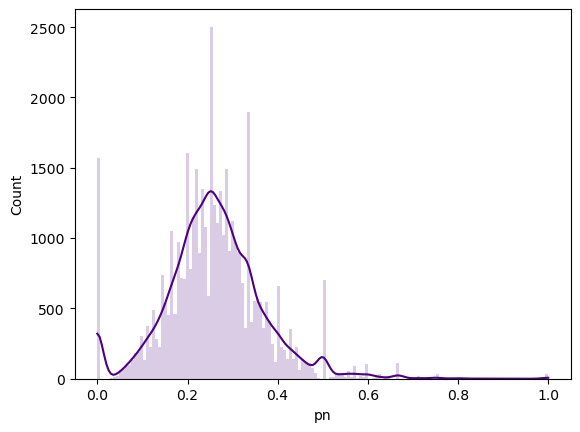

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

summaries['pn'] = summaries['positive_count']/(summaries['positive_count']+summaries['negative_count'])
movie_data['pn'] = movie_data['title_positive_count']/(movie_data['title_positive_count']+movie_data['title_negative_count'])

sns.histplot(summaries['pn'], kde=True, alpha=0.2,linewidth=0, color = 'indigo')

<AxesSubplot:ylabel='Frequency'>

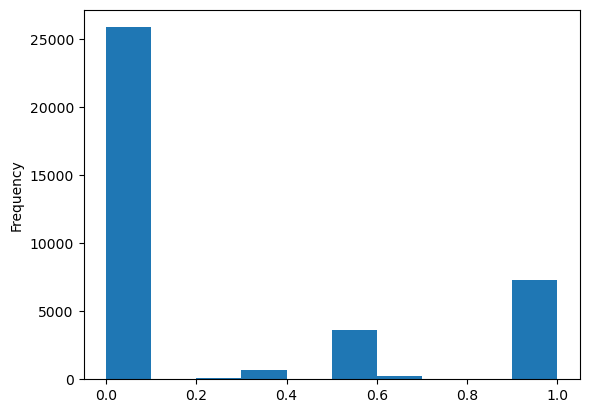

In [49]:
movie_data['pn'].plot.hist(bins=10)